Boston House Price Prediction (Regression Model)

In [27]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.head())
print(train.info())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

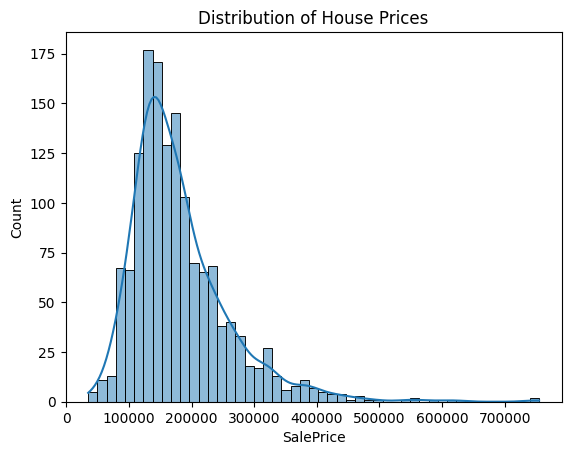

In [28]:
# Checking distributions and correlation

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.show()


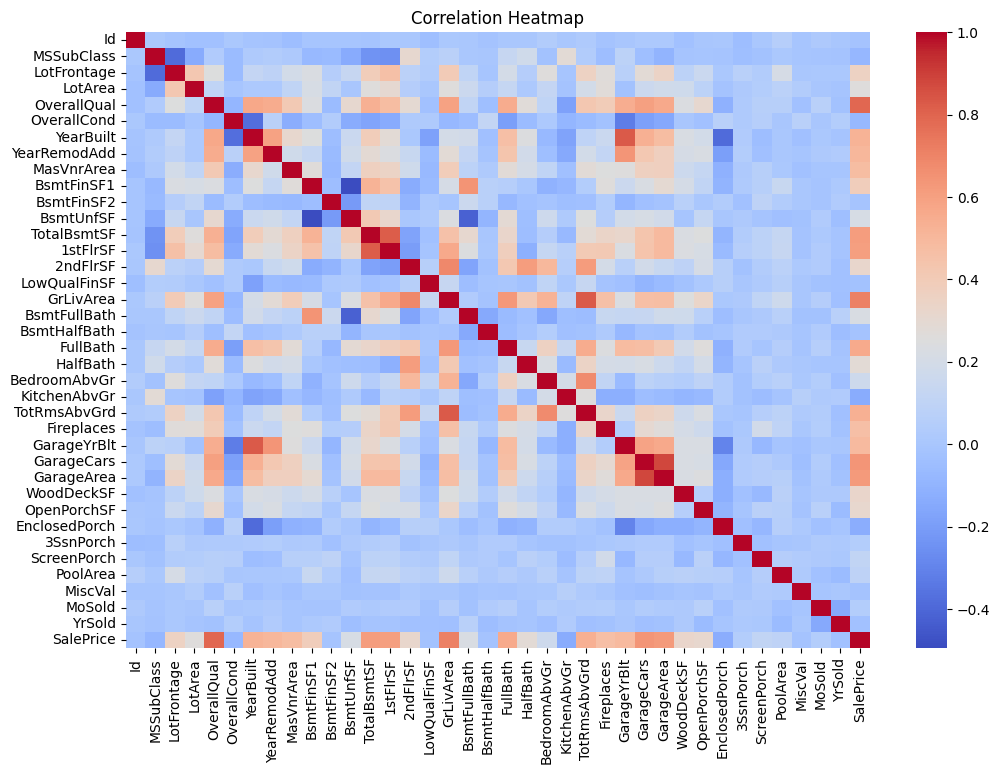

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [29]:
# check which features are strongly related to SalePrice

corr = train.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Sort correlations with SalePrices

print(corr['SalePrice'].sort_values(ascending=False).head(10))

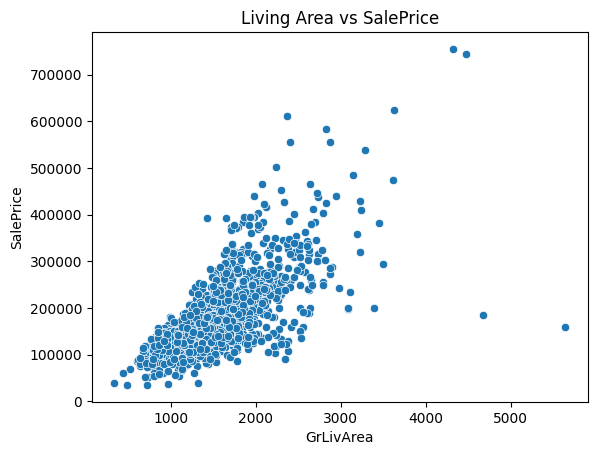

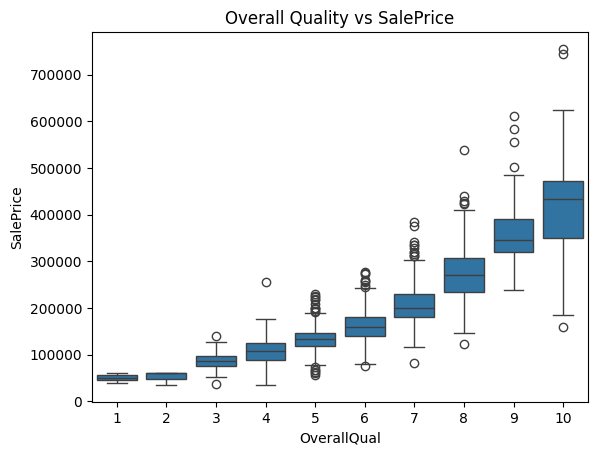

In [30]:
# Relation with numerical features and prices

sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title("Living Area vs SalePrice")
plt.show()

sns.boxplot(x=train['OverallQual'], y=train['SalePrice'])
plt.title("Overall Quality vs SalePrice")
plt.show()


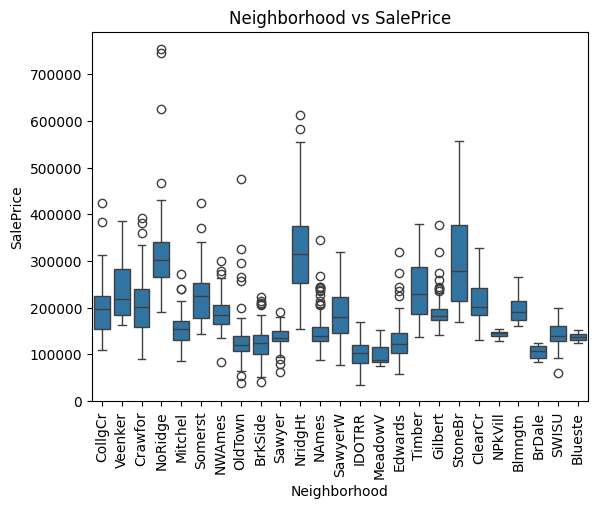

In [31]:
# Categorical Features

sns.boxplot(x=train['Neighborhood'], y=train['SalePrice'])
plt.xticks(rotation=90)
plt.title("Neighborhood vs SalePrice")
plt.show()


In [32]:
print(train.isnull().sum().sort_values(ascending=False).head(20))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64


In [33]:
print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [34]:
print(test.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object


In [35]:
# Convert Categorical columns into numbers

from sklearn.preprocessing import LabelEncoder

categorical_cols_train = train.select_dtypes(include=['object']).columns
categorical_cols_test = test.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols_train:
    train[col] = le.fit_transform(train[col])

for col in categorical_cols_test:
    test[col] = le.fit_transform(test[col])

In [36]:
# Handling missing values, Drop irrelevant columns

train.drop(['Id'], axis=1, inplace=True)
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)



In [37]:
# Splitting training dataset into train and validation

from sklearn.model_selection import train_test_split

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=23)


In [46]:
# Training Regression Models
# 1. Linear Regression

import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_train)
y_pred_val1 = lr.predict(X_val)
print("Linear Regression RMSE: ", math.sqrt(mean_squared_error(y_train, y_pred1)))
print("Validation RMSE: ", math.sqrt(mean_squared_error(y_val, y_pred_val1)))

Linear Regression RMSE:  31573.399793372966
Validation RMSE:  25372.159017716825


In [47]:
# 1. RandomForestRegressor

import math
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=23)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_train)
y_pred_val2 = rf.predict(X_val)
print("Random Forest RMSE: ", math.sqrt(mean_squared_error(y_train, y_pred2)))
print("Validation RMSE: ", math.sqrt(mean_squared_error(y_val, y_pred_val2)))

Random Forest RMSE:  11835.36763213368
Validation RMSE:  22167.94245495694


In [49]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,2,3,3,0,...,120,0,2,2,3,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,2,0,3,0,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,2,0,3,0,...,0,0,2,2,3,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,2,0,3,0,...,0,0,2,4,3,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,2,0,1,0,...,144,0,2,4,3,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,2,3,3,0,...,0,0,2,4,3,0,6,2006,8,4
1455,2916,160,4,21.0,1894,1,2,3,3,0,...,0,0,2,4,3,0,4,2006,8,0
1456,2917,20,3,160.0,20000,1,2,3,3,0,...,0,0,2,4,3,0,9,2006,8,0
1457,2918,85,3,62.0,10441,1,2,3,3,0,...,0,0,2,2,2,700,7,2006,8,4


In [50]:
# Since Error is less in RandomForestRegressor it is choosed as final model

Model = RandomForestRegressor(n_estimators=100, random_state=23)
Model.fit(X, y)
y_pred = Model.predict(test.drop(['Id'], axis=1))



In [51]:
output = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})
output.to_csv('submission.csv', index=False)

In [52]:
output

,Id,SalePrice
0,1461,127799.91
1,1462,155744.25
2,1463,179481.00
3,1464,180468.96
4,1465,197346.26
...,...,...
1454,2915,86809.00
1455,2916,88014.75
1456,2917,151967.00
1457,2918,115494.50
